In [20]:
class Person:
    
    # initializer 생성자
    # __이름__() : 매직메소드, Dundu method
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return self.name
    
    # 객체를 함수처럼 사용할 수 있도록 하는 매직메소드
    # 객체()
    def __call__(self, age):
        print('__call__', self.name, age)
        return age+50

In [22]:
result = Person('aa')(50)
result

__call__ aa 50


100

In [21]:
p = Person('ㅁㅁ')
r = p(20)
print(r)

__call__ ㅁㅁ 20
70


In [19]:
p = Person('이순신')
p()   # __call__() 매직메소드 호출

__call__ 이순신


In [15]:
p = Person('홍길동')
print(p.name)

홍길동


In [16]:
str(p)  # value -> 문자열로 바꿔줌. value가 객체일 경우 __str__()이 호출됨

'홍길동'

In [17]:
print(p)

홍길동


# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다. 그래서 다양한 구조의 네트워크를 만드는데 한계가 있다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 입력 텐서(Input Tensor)를 입력 받고 그 결과를 출력 텐서(Output Tensor)로 반환하는 형식으로 모델을 구현한다.


```
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

## Sequential, Functional API 

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

### Sequential

In [24]:
seq_model = keras.Sequential()
seq_model.add(layers.InputLayer(input_shape=(32,32,3)))
seq_model.add(layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.MaxPooling2D(padding='same'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(8, activation='relu'))
seq_model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 32776     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________________


### Functional

In [27]:
# 레이어들의 구조를 먼저 만든다.
input_tensor = layers.Input(shape=(32,32,3))   # input layer는 입력을 지정하지 않는다. input layer 객체가 아니라 input tensor로 지정해야 함

conv_tensor = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)

mp_tensor = layers.MaxPooling2D(padding='same')(conv_tensor)

flat_tensor = layers.Flatten()(mp_tensor)

d1_tensor = layers.Dense(8, activation='relu')(flat_tensor)

output_tensor = layers.Dense(1, activation='sigmoid')(d1_tensor)

# 모델 정의
fn_model = models.Model(input_tensor, output_tensor)   # 입력 tensor, 출력 tensor 넣어주면 됨
# 모델 컴파일, 학습, 평가, 추론 방식은 동일

In [28]:
fn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 32776     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,233
Trainable params: 33,233
Non-trainable params: 0
_________________________________________________________

In [ ]:
# 출력 변수들은 일반적으로 block 단위로 동일하게 사용
input_tensor = layers.Input(shape=(32,32,3))   # input layer는 입력을 지정하지 않는다. input layer 객체가 아니라 input tensor로 지정해야 함

x1 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.MaxPooling2D(padding='same')(x1)

x2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x1)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Flatten()(x2)
x3 = layers.Dense(8, activation='relu')(x3)

output_tensor = layers.Dense(1, activation='sigmoid')(x3)

# 모델 정의
fn_model = models.Model(input_tensor, output_tensor)

In [ ]:
# trainable 설정
from tensorflow.keras.applications import VGG16
conv_base = VGG16(include_top=False)
# conv_base.trainable = False

input_tensor = layers.Input(shape=(224.224,3))   # input layer는 입력을 지정하지 않는다. input layer 객체가 아니라 input tensor로 지정해야 함

x1 = conv_base(input_tensor)
x1 = layers.GlobalAveragePooling2D()(x1)

output_tensor = layers.Dense(1, activation='sigmoid')(x1)

# 모델 정의
model = models.Model(input_tensor, output_tensor)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 레이어를 합치는 함수
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축 기준)
    - 합치려는 축을 제외한 나머지 shape의 size는 같아야 한다
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [31]:
# ResNet의 residual block 구성
input_tensor = layers.Input(shape=(32,32,3))

x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
# ------ residual block
x1 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.ReLU()(x1)

x2 = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x1)
x2 = layers.BatchNormalization()(x2)

# input_tensor(입력), c2(block의 출력)을 더한다.
add_result = layers.add([x, x2])

output_tensor = layers.ReLU()(add_result)

residual_model = models.Model(input_tensor, output_tensor)

In [33]:
residual_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 64)   1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_7[0][0]                   
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 32, 32, 64)   256         conv2d_8[0][0]                   
____________________________________________________________________________________________

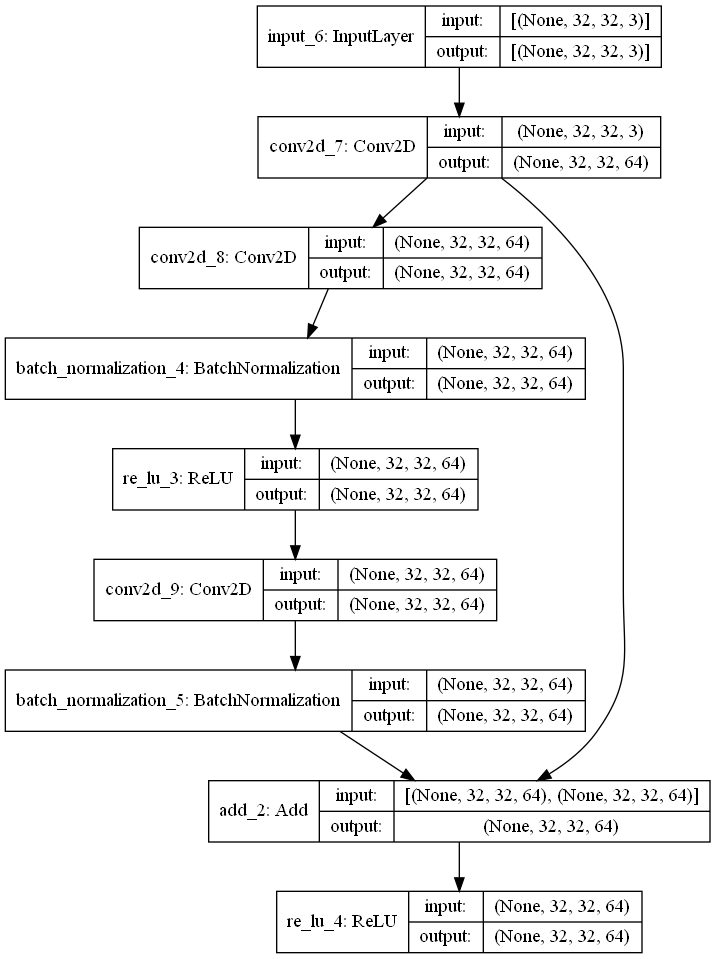

In [34]:
keras.utils.plot_model(residual_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃입의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [40]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [41]:
# 꽃잎 너비 = y2, 꽃잎 높이 = y2, 종류 = y3
# X: [꽃받침 너비, 높이]
y1 = X[:, 2]
y2 = X[:, 3]
y3 = y

X = X[:, [0,1]]
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

In [42]:
# 모델 정의 - 입력:X, 출력:y1, y2, y3 (다중출력)
input_tensor = layers.Input(shape=(2,))

# hidden
x = layers.Dense(16, activation='relu')(input_tensor)
x = layers.Dense(8, activation='relu')(x)

# 출력 layer 3개
output_1 = layers.Dense(1, name='petal_width_output')(x)   # 꽃잎 너비(연속형)-회귀 : units=1, activation=none
output_2 = layers.Dense(1, name='peta_length_output')(x)
output_3 = layers.Dense(3, activation='softmax', name='species_output')(x)   # 종류(범주형/다중분류) : units=class개수, activation=softmax

# o = layers.concatenate([o1, o2, o3])
# layers.Dense(...)(o)

# 모델
model = models.Model(input_tensor, [output_1, output_2, output_3])  #input/output이 여러개일 경우 List로 묶어서 전달.

In [43]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           48          input_7[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 8)            136         dense_4[0][0]                    
__________________________________________________________________________________________________
petal_width_output (Dense)      (None, 1)            9           dense_5[0][0]                    
____________________________________________________________________________________________

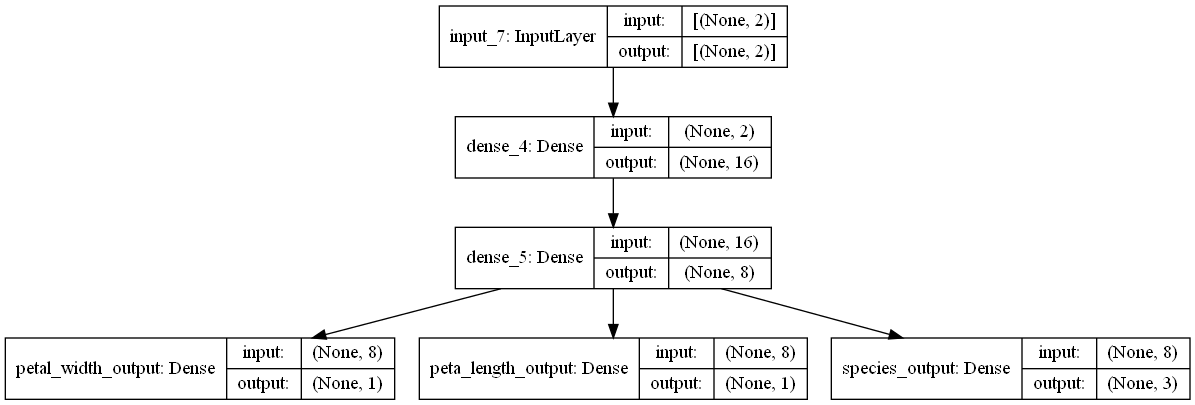

In [44]:
keras.utils.plot_model(model, show_shapes=True)

In [45]:
# 컴파일
model.compile(optimizer='adam',
              loss=["mse", "mse", "sparse_categorical_crossentropy"]) #sparse_categorical_crossentropy: y(정답)을 내부적으로 원핫인코딩 처리후 오차계산을 해준다.

# 출력(예측) 결과가 3개에 대한 각각의 loss 함수를 순서대로 리스트로 묶어서 전달.
# 3개의 오차를 더해서 total loss를 계산한 뒤 total loss를 기반으로 역전파해서 파라미터들을 업데이트 한다.

In [46]:
# 학습
hist= model.fit(x=X, 
              y=[y1, y2, y3], 
              epochs=100, 
              validation_split=0.1)

Epoch 1/100
5/5 [==============================] - 1s 99ms/step - loss: 20.2106 - petal_width_output_loss: 14.7873 - peta_length_output_loss: 3.5194 - species_output_loss: 1.9040 - val_loss: 36.1521 - val_petal_width_output_loss: 25.4251 - val_peta_length_output_loss: 7.7241 - val_species_output_loss: 3.0030
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 18.3164 - petal_width_output_loss: 13.1929 - peta_length_output_loss: 3.2876 - species_output_loss: 1.8358 - val_loss: 33.1421 - val_petal_width_output_loss: 22.9485 - val_peta_length_output_loss: 7.3248 - val_species_output_loss: 2.8688
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 16.5724 - petal_width_output_loss: 11.7439 - peta_length_output_loss: 3.0567 - species_output_loss: 1.7718 - val_loss: 30.3882 - val_petal_width_output_loss: 20.7386 - val_peta_length_output_loss: 6.9055 - val_species_output_loss: 2.7441
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss:

Epoch 28/100
5/5 [==============================] - 0s 9ms/step - loss: 3.7103 - petal_width_output_loss: 2.0786 - peta_length_output_loss: 0.4821 - species_output_loss: 1.1495 - val_loss: 4.7428 - val_petal_width_output_loss: 2.2645 - val_peta_length_output_loss: 0.9730 - val_species_output_loss: 1.5054
Epoch 29/100
5/5 [==============================] - 0s 9ms/step - loss: 3.6698 - petal_width_output_loss: 2.0459 - peta_length_output_loss: 0.4780 - species_output_loss: 1.1459 - val_loss: 4.5760 - val_petal_width_output_loss: 2.1128 - val_peta_length_output_loss: 0.9628 - val_species_output_loss: 1.5005
Epoch 30/100
5/5 [==============================] - 0s 8ms/step - loss: 3.6395 - petal_width_output_loss: 2.0241 - peta_length_output_loss: 0.4738 - species_output_loss: 1.1416 - val_loss: 4.3739 - val_petal_width_output_loss: 1.9602 - val_peta_length_output_loss: 0.9273 - val_species_output_loss: 1.4863
Epoch 31/100
5/5 [==============================] - 0s 8ms/step - loss: 3.6020 - p

5/5 [==============================] - 0s 10ms/step - loss: 2.8860 - petal_width_output_loss: 1.4363 - peta_length_output_loss: 0.3653 - species_output_loss: 1.0844 - val_loss: 3.6602 - val_petal_width_output_loss: 1.5170 - val_peta_length_output_loss: 0.7643 - val_species_output_loss: 1.3789
Epoch 55/100
5/5 [==============================] - 0s 8ms/step - loss: 2.8526 - petal_width_output_loss: 1.4101 - peta_length_output_loss: 0.3603 - species_output_loss: 1.0822 - val_loss: 3.6920 - val_petal_width_output_loss: 1.5477 - val_peta_length_output_loss: 0.7729 - val_species_output_loss: 1.3715
Epoch 56/100
5/5 [==============================] - 0s 10ms/step - loss: 2.8162 - petal_width_output_loss: 1.3831 - peta_length_output_loss: 0.3539 - species_output_loss: 1.0793 - val_loss: 3.8873 - val_petal_width_output_loss: 1.7013 - val_peta_length_output_loss: 0.8227 - val_species_output_loss: 1.3633
Epoch 57/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7914 - petal_width

Epoch 81/100
5/5 [==============================] - 0s 9ms/step - loss: 2.0736 - petal_width_output_loss: 0.8549 - peta_length_output_loss: 0.2343 - species_output_loss: 0.9844 - val_loss: 3.0444 - val_petal_width_output_loss: 1.0918 - val_peta_length_output_loss: 0.6749 - val_species_output_loss: 1.2777
Epoch 82/100
5/5 [==============================] - 0s 8ms/step - loss: 2.0592 - petal_width_output_loss: 0.8485 - peta_length_output_loss: 0.2308 - species_output_loss: 0.9799 - val_loss: 2.9243 - val_petal_width_output_loss: 1.0142 - val_peta_length_output_loss: 0.6410 - val_species_output_loss: 1.2691
Epoch 83/100
5/5 [==============================] - 0s 8ms/step - loss: 2.0293 - petal_width_output_loss: 0.8284 - peta_length_output_loss: 0.2260 - species_output_loss: 0.9749 - val_loss: 3.0054 - val_petal_width_output_loss: 1.0858 - val_peta_length_output_loss: 0.6459 - val_species_output_loss: 1.2738
Epoch 84/100
5/5 [==============================] - 0s 8ms/step - loss: 2.0071 - p

In [47]:
# 추론
import numpy as np
new_data = X[0]
new_data = new_data[np.newaxis, ...]
new_data

array([[5.1, 3.5]])

In [48]:
pred = model.predict(new_data)
pred

[array([[2.259538]], dtype=float32),
 array([[0.611015]], dtype=float32),
 array([[0.52051294, 0.23932132, 0.24016583]], dtype=float32)]

In [49]:
print(y1[0])
print(y2[0])
print(y3[0])

1.4
0.2
0


## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [50]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [51]:
# iris 사진 대신 mnist 사진을 사용 - 6만개중 150개만 추출
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_img = X_train[:150]
X_train.shape, X_img.shape

((60000, 28, 28), (150, 28, 28))

In [52]:
# input을 2개 받는 모델 구현
iris_info_tensor = layers.Input(shape=(4,)) #꽃정보 input
x1 = layers.Dense(units=32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(units=16, activation='relu')(x1)

iris_img_tensor = layers.Input(shape=(28, 28, 1))

x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu')(x2)
x2 = layers.MaxPooling2D(padding='same')(x2)

x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPooling2D(padding='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

# x1, x3를 합치기. - info, img 두개 정보를 합치는 것.
x4 = layers.concatenate([x1, x3])

output_tensor = layers.Dense(units=3, activation='softmax')(x4)

model = models.Model([iris_info_tensor, iris_img_tensor] , output_tensor)


In [53]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 32)   320         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 32)   0           conv2d_11[0][0]                  
____________________________________________________________________________________________

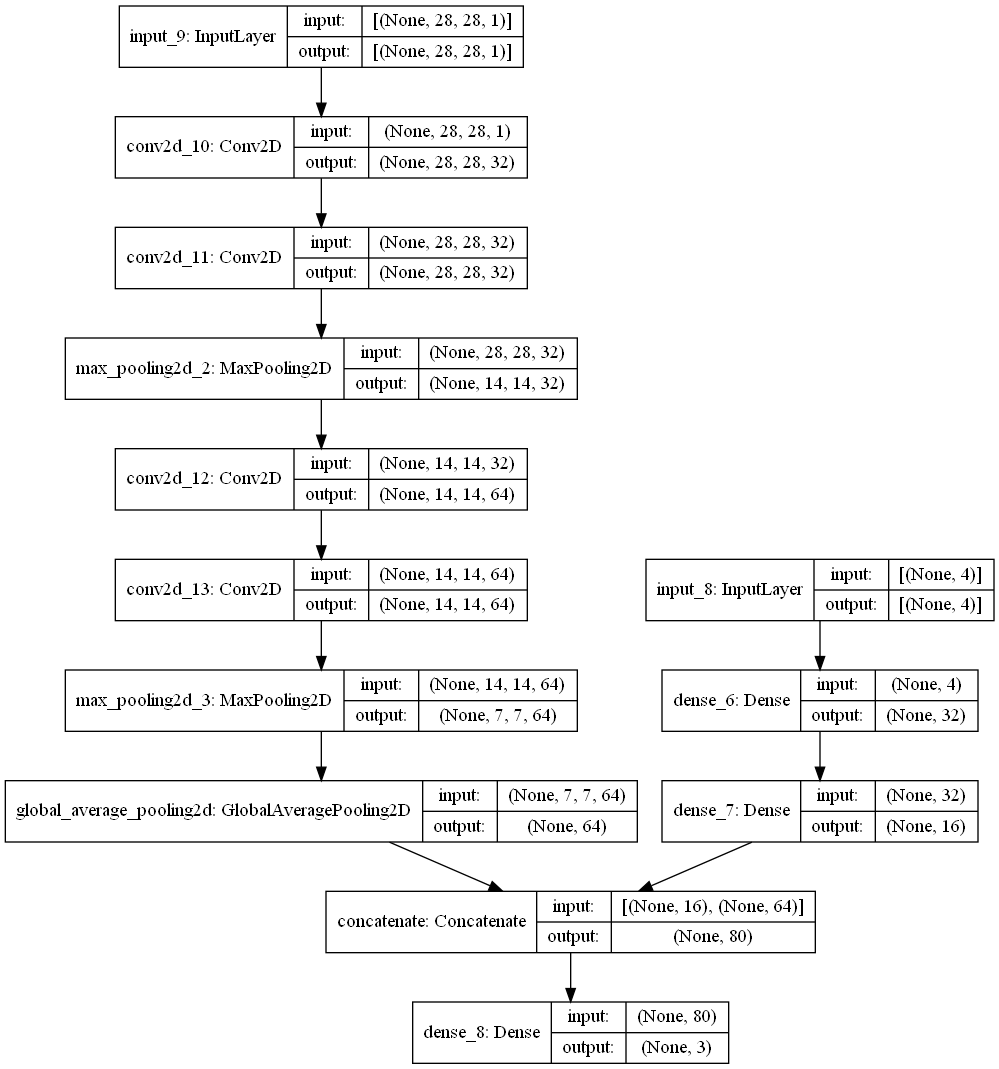

In [54]:
keras.utils.plot_model(model, show_shapes=True)

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(x=[X, X_img],  #입력이 2개이므로 순서대(모델에 layer추가한 순서)로 리스트로 묶어서 전달.
          y=y, 
          epochs=2,
          validation_split=0.1)

Epoch 1/2
5/5 [==============================] - 1s 123ms/step - loss: 5.7023 - accuracy: 0.3111 - val_loss: 3.8617 - val_accuracy: 0.0000e+00
Epoch 2/2
5/5 [==============================] - 0s 80ms/step - loss: 1.7489 - accuracy: 0.4222 - val_loss: 4.6569 - val_accuracy: 0.0000e+00


In [57]:
tf.data.Dataset.from_tensor_slices(((X, X_img), y))

<TensorSliceDataset shapes: (((4,), (28, 28)), ()), types: ((tf.float64, tf.uint8), tf.int32)>